# Stage 4: Where do I find the data?

This is data science and data analysis after all. We need data. And when we have data, we need to know what data we have. Here are the big questions around finding and prepping data:
* Where do I find the data?
* How can I use the data?
* How do I know that I have the right data?
* **BONUS** How can I make it easy to retrieve and use again? (Without copy and pasting code)

### Imagine: a hypothetical workflow for downloaded data 
(Assuming you're using reproducible environments already!)

1. **Downloading data**: First, you look for a dataset to use. You get one. You download the data, or you copy and paste a script you find off of the internet for how to download the data. 
2. **Data prep**: Then you copy and paste the munging script that you saw for how to get it into a pandas dataframe.
3. **Data prep-2**: You try some analysis, but it doesn't quite work, you need to clean the data up a bit more, so you go back to doing some more prep, this time, your own way. 
4. **Analysis**: Finally, you can run your analysis and do some data science work. 
5. ...time passes...
6. **Re-downloading**: You mention the result and a colleague asks you about the work, so you go back to dig up the code. You decide to see if you can share your work. You start to run your code, but then realize that the dataset has been updated. It's not clear what's been changed, but you notice in the output that there seem to be more entries in the dataframe. When your script downloaded it, you replaced the previous dataset with the new one. 
7. **Checking licenses**: When you go to try and figure out what happened, and start looking up info on the dataset. The source you used for information the first time doesn't seem to be up-to-date so you keep digging until you find the original source. In the process, you realize you forgot to look at the license. Better check on that before sharing your work. Thankfully, it's CC-BY-NC, and you're not using it for work purposes. You take a sigh of relief, as this could have been a show-stopper, and you continue.
8. **Data prep-3**: You can't roll back to the old data, and the new data has some new gotchas, so you spend some time trying to sort that out. Finally you have something that you can re-run your analysis on, and share with your colleague. 
9. **Analysis-2**: Fingers crossed with the new larger dataset that things work our roughly the same. There's no easy way now to figure out what's going on if the results look different from before...
10. **Sharing**: Phew. Wiping the sweat from your brow, things look roughly similar. You can pass on the work to your colleague.

In the hypothetical (or not...this may be pulling from personal experience) situation above, getting to the analysis stage the second time around took just as long, if not longer because of trying to figure out what had changed about the dataset, and tracking down the dataset information and licenses, which were no longer as easy to find.

### Some Reproducibility issues
In the previous workflow, here were some of the issues that made it hard to reproduce:

* **NO-DATA-LICENSE**: No data license with the data. In fact, we forgot to even check the first time. It wasn't a showstopper, this time, but it could have easily been.
* **NO-DATA-METADATA**: No metadata with the data. We didn't have a description of what the data was in a way that made it easy to see what the data was. And in this case, what might have changed with the new metadata.
* **NO-DATA-HASH**: No data hash. This meant that there was no way to catch early on that the data was different. 
* **COOKED-DATA**: Data gets cooked when it gets changed. In this case, the change was downloading the new data on top of the old. Most frequently, we see this happening when data that gets preped gets saved over the raw data. Repeat after me: "Data is immutable".
* **BLACK-MAGIC**: The data prep was a form of black magic. In this example, we copied and pasted, and we didn't pay attention to what was inside it, it just worked the first time. In particular, the download script had a hard-coded path that the download went to and it would redownload the file into the same place every time. 


### Default Better Principles

* **Data and metadata always stay together**: Keep your data and your metadata together at all times. This includes licenses and hashes. 
* **Keep a hash of your data and check it**: This is especially true for your raw data, your starting points from which the rest of your data is derived.
* **Data is immutable**: Never edit a raw data file. Especially not manually. Don't overwrite your raw data. Don't save multiple versions of the raw data. Treat the data (and its format) as immutable. 
* **Keep (easy-to-use) data recipes**: The code you write should move the raw data through a pipeline to your final analysis. Keep data recipes as a way of recovering your data from its raw format. Your data recipe ideally has an easy-to-use API that gives people you're sharing with a *common start line* when working with the data from a relatively cleaned up state.

## The Easydata Way: `Dataset.load("my-dataset-name")`

**Your Next Tasks in the Reproducibility Quest**
* Load a dataset from the catalog
* Generate and save some derived datasets back to the catalog

Now we'll take a look at how we do this in Easydata. First, some imports that we'll need.

In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
from src.data import Dataset
import logging
from src.log import logger
from src.helpers import notebook_as_transformer

In [3]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

### Set to debug log level

Easydata makes extensive use of python's excellent logging framework to let you know what is going on under the hood.

Because this is a tutorial, let's set the log level for these messages to DEBUG to see what the Dataset code is doing under the hood. These messages will show up in pink when the notebook runs.

If you find this output to be too noisy later on, you can always change the log level to something quieter, like `logging.INFO`.

In [4]:
logger.setLevel(logging.DEBUG)

## Dataset objects

#### Default Better Principle: Data and metadata always stay together
The Dataset object has metadata attached to it. By **default** Dataset objects keep their metadata with them at all times.

In [5]:
ds = Dataset.load("dataset-challenge")

2021-10-29 23:47:01,972 - catalog - DEBUG - Loaded 3 records from 'transformers' Catalog.


2021-10-29 23:47:01,972 - catalog - DEBUG - Verifying serialization for catalog 'transformers'


2021-10-29 23:47:01,974 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2021-10-29 23:47:01,975 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2021-10-29 23:47:01,976 - datasets - DEBUG - Loaded DatasetGraph with 4 nodes and 3 edges.


2021-10-29 23:47:01,977 - datasets - DEBUG - Verifying hashes using Dataset catalog.


2021-10-29 23:47:01,978 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2021-10-29 23:47:01,979 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2021-10-29 23:47:01,981 - datasets - DEBUG - Load dataset-challenge from disk...


2021-10-29 23:47:01,982 - datasets - DEBUG - Loaded dataset-challenge from disk.


In [6]:
print(ds.DESCR)


The `.DESCR` is where Easydata keeps a description of the dataset. In this example, you'll see that we have a Dataset object container with metadata, but no data.

For this dataset, if you do a ds.data, you will return NONE. 

A basic description of the data is something that always stays with the data, Easydata uses a descr as one of its metadata fields which can be accessed via

`.DESCR`

for any Dataset object.

When you transform the data, it is nice to append new information including what has been done to the data via the transformation by appending information to the end of the `.DESCR` text.

You can add any metadata you want to ds.metdata, as it is basically a dict with a fancy wrapping paper that lets you access any key via ALL CAPS.



In [7]:
ds.data

In [8]:
print(ds.LICENSE)


CC-BY-4.0 is a common form of dataset license. Here you would put the license for your data, along with any attribution and other information necessary to keep in line with the terms included in the original license.

All data that you use should have an explicit license kept with it. To keep the license with the data, Easydata uses a license as one of its metadata fields which can be accessed via

`.LICENSE`

for any Dataset object.

For more on licenses, see the references at the end of the `04-Data-Challenge` notebook.



Penguin data
------------
<img src="https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png" alt="Penguins" width=400px/>

Time to try it out. The next step is to get some data to work with. To ease us into things
we'll start with the [penguin
dataset](https://github.com/allisonhorst/penguins). It isn't very
representative of what real data would look like, but it is small both
in number of points and number of features, and will let us quickly and easily get started.

## Load the pre-created a Dataset recipe

Here we use the dataset recipe to get the raw penguins dataset. When running 

```ds = Dataset.load('penguins-raw')```

Easydata uses an entry in the Dataset Catalog to find the `penguins-raw` Dataset recipe.

Here's what it will do:
* Look in the Catalog for the entry `penguins-raw`
* Traceback through the dependency chain of datasets looking for what's already cashed and matches the hash check, and what needs to be created from scratch
* If this is your first time running, it will download the dataset and created it the first time, populating the `data/raw` directory with the raw download
* Do a hash check
* Create the `penguins-raw` Dataset
* If successful, it will save a processed version of the data in `data/processed` for quick and easy loading any time

Say you need more space on your machine. You can blow away the contents of your `data/processed` directory at any time, and `.load("penguins-raw")` will recreate the Dataset again from `data/raw` whenever you need to use it.


In [9]:
ds = Dataset.load('penguins-raw')

2021-10-29 23:47:02,004 - catalog - DEBUG - Loaded 3 records from 'transformers' Catalog.


2021-10-29 23:47:02,005 - catalog - DEBUG - Verifying serialization for catalog 'transformers'


2021-10-29 23:47:02,006 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2021-10-29 23:47:02,007 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2021-10-29 23:47:02,008 - datasets - DEBUG - Loaded DatasetGraph with 4 nodes and 3 edges.


2021-10-29 23:47:02,009 - datasets - DEBUG - Verifying hashes using Dataset catalog.


2021-10-29 23:47:02,010 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2021-10-29 23:47:02,010 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2021-10-29 23:47:02,012 - datasets - DEBUG - Load penguins-raw from disk...


2021-10-29 23:47:02,013 - datasets - DEBUG - Loaded penguins-raw from disk.


#### Default Better Principle: Keep a hash of your data and check it
To see what happens with a saved cached copy, load it again. Note the hash check.

In [10]:
ds = Dataset.load('penguins-raw')

2021-10-29 23:47:02,019 - catalog - DEBUG - Loaded 3 records from 'transformers' Catalog.


2021-10-29 23:47:02,020 - catalog - DEBUG - Verifying serialization for catalog 'transformers'


2021-10-29 23:47:02,022 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2021-10-29 23:47:02,022 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2021-10-29 23:47:02,023 - datasets - DEBUG - Loaded DatasetGraph with 4 nodes and 3 edges.


2021-10-29 23:47:02,024 - datasets - DEBUG - Verifying hashes using Dataset catalog.


2021-10-29 23:47:02,025 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2021-10-29 23:47:02,026 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2021-10-29 23:47:02,027 - datasets - DEBUG - Load penguins-raw from disk...


2021-10-29 23:47:02,028 - datasets - DEBUG - Loaded penguins-raw from disk.


The `penguins-raw` dataset contains information on where to find a single raw data file: `penguins_size.csv`. This is the raw data. 

In [11]:
ds.EXTRA

{'penguins-raw.extra': {'penguins_size.csv': ['size:13525']}}

Normally, the hash is stored with the metadata and checked into the Dataset catalogue. Technically, it is here, with the hash of `None`.

In [12]:
ds.HASHES

{'data': 'sha1:38f65f3b11da4851aaaccc19b1f0cf4d3806f83b',
 'target': 'sha1:38f65f3b11da4851aaaccc19b1f0cf4d3806f83b'}

For files, `.EXTRA` contains the hash information. We have the choice to store the `size` as the hash to keep giant data stores more manageable. We could also choose to use a hash function instead of `size` if we wanted to. 

In [13]:
print(ds.DESCR)


The goal of palmerpenguins is to provide a great dataset for data exploration & visualization, as an alternative to `iris`.

More information can be found at [https://github.com/allisonhorst/palmerpenguins](https://github.com/allisonhorst/palmerpenguins).

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

The data consists of measurements of bill (culmen) and flippers and weights of three species of penguins, along with some other metadata about the penguins. In total we have 334 different penguins measured.


<img src="https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png" alt="Diagram of culmen measurements on a penguin" width=300px/>

In [14]:
print(ds.LICENSE)


Data are available by [CC-0](https://github.com/allisonhorst/palmerpenguins) license in accordance with the Palmer Station LTER Data Policy and the LTER Data Access Policy for Type I data.



Without going in to the details, `.EXTRA` lets us manage files off of our local system if necessary and keeps track of raw data file details for our Dataset recipes. To get the fully qualified path to `penguins_size.csv` or any `.EXTRA` file, we can use 

`.EXTRA` will always keep track of relative paths so you are never checking in anything except relative paths to your repo, while using your local paths to resolve where to find the files via `.extra_file()`.

In [15]:
ds.extra_file('penguins_size.csv')

'/Users/kjell/Documents/devel/timc/easydata-tutorial/data/processed/penguins-raw.extra/penguins_size.csv'

Let's start looking at the data

In [16]:
penguins = pd.read_csv(ds.extra_file('penguins_size.csv'))
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


First up, we will get rid of the NAs in
the data.

In [17]:
penguins = penguins.dropna()
penguins.species_short.value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species_short, dtype: int64

Visualizing this data is a little bit
tricky since we can't plot in 4 dimensions easily. Fortunately four is
not that large a number, so we can just to a pairwise feature
scatterplot matrix to get an ideas of what is going on. Seaborn makes
this easy.

2021-10-29 23:47:02,440 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.


2021-10-29 23:47:02,441 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,442 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,442 - font_manager - DEBUG - findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,442 - font_manager - DEBUG - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,443 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,443 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,444 - font_manager - DEBUG - findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,444 - font_manager - DEBUG - findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,445 - font_manager - DEBUG - findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,445 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,446 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05


2021-10-29 23:47:02,446 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,446 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,447 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335


2021-10-29 23:47:02,447 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,448 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,448 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 2.05


2021-10-29 23:47:02,449 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,449 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 2.335


2021-10-29 23:47:02,449 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,450 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,450 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,450 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,451 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 3.335


2021-10-29 23:47:02,451 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,452 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,452 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,452 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,453 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,453 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 3.05


2021-10-29 23:47:02,453 - font_manager - DEBUG - findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,454 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,454 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,455 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,455 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,456 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,456 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,457 - font_manager - DEBUG - findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,457 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,457 - font_manager - DEBUG - findfont: score(<Font 'DIN Condensed' (DIN Condensed Bold.ttf) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:02,458 - font_manager - DEBUG - findfont: score(<Font 'Verdana' (Verdana Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,458 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Sundanese' (NotoSansSundanese-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,459 - font_manager - DEBUG - findfont: score(<Font 'Skia' (Skia.ttf) normal normal 5 normal>) = 10.42525


2021-10-29 23:47:02,459 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille Outline 6 Dot.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,460 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneral.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,460 - font_manager - DEBUG - findfont: score(<Font 'Mukta Mahee' (MuktaMahee.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,460 - font_manager - DEBUG - findfont: score(<Font 'PT Sans' (PTSans.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,461 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,461 - font_manager - DEBUG - findfont: score(<Font 'Seravek' (Seravek.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,462 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,462 - font_manager - DEBUG - findfont: score(<Font 'Corsiva Hebrew' (Corsiva.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,462 - font_manager - DEBUG - findfont: score(<Font 'Gujarati Sangam MN' (Gujarati Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,463 - font_manager - DEBUG - findfont: score(<Font 'Wingdings' (Wingdings.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,463 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,463 - font_manager - DEBUG - findfont: score(<Font 'Comic Sans MS' (Comic Sans MS.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,464 - font_manager - DEBUG - findfont: score(<Font 'Gurmukhi Sangam MN' (Gurmukhi Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,464 - font_manager - DEBUG - findfont: score(<Font '.Aqua Kana' (AquaKana.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:02,464 - font_manager - DEBUG - findfont: score(<Font 'Kokonor' (Kokonor.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,465 - font_manager - DEBUG - findfont: score(<Font 'System Font' (SFNSItalic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,465 - font_manager - DEBUG - findfont: score(<Font 'Helvetica' (Helvetica.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,466 - font_manager - DEBUG - findfont: score(<Font 'Khmer MN' (Khmer MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,466 - font_manager - DEBUG - findfont: score(<Font 'Muna' (Muna.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,466 - font_manager - DEBUG - findfont: score(<Font 'Superclarendon' (SuperClarendon.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,467 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Black.otf) normal normal 900 condensed>) = 10.725


2021-10-29 23:47:02,467 - font_manager - DEBUG - findfont: score(<Font 'Sathu' (Sathu.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,467 - font_manager - DEBUG - findfont: score(<Font 'Gujarati MT' (GujaratiMT.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,468 - font_manager - DEBUG - findfont: score(<Font 'Myanmar Sangam MN' (Myanmar Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,468 - font_manager - DEBUG - findfont: score(<Font 'Marion' (Marion.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,468 - font_manager - DEBUG - findfont: score(<Font 'Lucida Grande' (LucidaGrande.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:02,469 - font_manager - DEBUG - findfont: score(<Font 'Bangla MN' (Bangla MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,469 - font_manager - DEBUG - findfont: score(<Font 'Kohinoor Bangla' (KohinoorBangla.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,470 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Medium.otf) normal normal 500 condensed>) = 10.344999999999999


2021-10-29 23:47:02,470 - font_manager - DEBUG - findfont: score(<Font 'New Peninim MT' (NewPeninimMT.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,470 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W6.ttc) normal normal 600 normal>) = 10.24


2021-10-29 23:47:02,471 - font_manager - DEBUG - findfont: score(<Font 'Georgia' (Georgia Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,471 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Gothic' (NotoSansGothic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,472 - font_manager - DEBUG - findfont: score(<Font 'Iowan Old Style' (Iowan Old Style.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,472 - font_manager - DEBUG - findfont: score(<Font 'Futura' (Futura.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:02,472 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Regular.otf) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:02,473 - font_manager - DEBUG - findfont: score(<Font 'AppleGothic' (AppleGothic.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,473 - font_manager - DEBUG - findfont: score(<Font 'Charter' (Charter.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,473 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.otf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,474 - font_manager - DEBUG - findfont: score(<Font 'Kailasa' (Kailasa.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,474 - font_manager - DEBUG - findfont: score(<Font 'Baghdad' (Baghdad.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,475 - font_manager - DEBUG - findfont: score(<Font 'American Typewriter' (AmericanTypewriter.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,475 - font_manager - DEBUG - findfont: score(<Font 'Krungthep' (Krungthep.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,475 - font_manager - DEBUG - findfont: score(<Font 'Beirut' (Beirut.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,476 - font_manager - DEBUG - findfont: score(<Font 'Savoye LET' (Savoye LET.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,476 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Vai' (NotoSansVai-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,476 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,477 - font_manager - DEBUG - findfont: score(<Font '.SF Compact Text' (SFCompactText.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,477 - font_manager - DEBUG - findfont: score(<Font 'Rockwell' (Rockwell.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,478 - font_manager - DEBUG - findfont: score(<Font 'Arial Hebrew' (ArialHB.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,478 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsD' (STIXIntDReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,478 - font_manager - DEBUG - findfont: score(<Font 'Snell Roundhand' (SnellRoundhand.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:02,478 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille Pinpoint 6 Dot.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,479 - font_manager - DEBUG - findfont: score(<Font 'Oriya Sangam MN' (Oriya Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,479 - font_manager - DEBUG - findfont: score(<Font 'Plantagenet Cherokee' (PlantagenetCherokee.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,480 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Avestan' (NotoSansAvestan-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,480 - font_manager - DEBUG - findfont: score(<Font 'Malayalam MN' (Malayalam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,481 - font_manager - DEBUG - findfont: score(<Font 'Khmer Sangam MN' (Khmer Sangam MN.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,481 - font_manager - DEBUG - findfont: score(<Font 'Bangla Sangam MN' (Bangla Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,481 - font_manager - DEBUG - findfont: score(<Font 'Bradley Hand' (Bradley Hand Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,482 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Myanmar' (NotoSansMyanmar.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:02,482 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Osmanya' (NotoSansOsmanya-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,483 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,483 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Cuneiform' (NotoSansCuneiform-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,483 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Semibold.otf) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:02,484 - font_manager - DEBUG - findfont: score(<Font 'Hoefler Text' (Hoefler Text.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,484 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans New Tai Lue' (NotoSansNewTaiLue-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,484 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Thaana' (NotoSansThaana-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,485 - font_manager - DEBUG - findfont: score(<Font 'Galvji' (Galvji.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,485 - font_manager - DEBUG - findfont: score(<Font 'Avenir Next' (Avenir Next.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,486 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Shavian' (NotoSansShavian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,486 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Old Persian' (NotoSansOldPersian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,486 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Bold.otf) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:02,487 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W9.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:02,487 - font_manager - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,487 - font_manager - DEBUG - findfont: score(<Font 'Bodoni 72 Oldstyle' (Bodoni 72 OS.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,488 - font_manager - DEBUG - findfont: score(<Font 'Chalkboard' (Chalkboard.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,488 - font_manager - DEBUG - findfont: score(<Font 'Heiti TC' (STHeiti Light.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:02,489 - font_manager - DEBUG - findfont: score(<Font 'Mshtakan' (Mshtakan.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,489 - font_manager - DEBUG - findfont: score(<Font 'Herculanum' (Herculanum.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,489 - font_manager - DEBUG - findfont: score(<Font 'Copperplate' (Copperplate.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,490 - font_manager - DEBUG - findfont: score(<Font 'DIN Alternate' (DIN Alternate Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,490 - font_manager - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,490 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tai Le' (NotoSansTaiLe-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,491 - font_manager - DEBUG - findfont: score(<Font 'Songti SC' (Songti.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:02,491 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Old Italic' (NotoSansOldItalic-Regular.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,492 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tagbanwa' (NotoSansTagbanwa-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,492 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Linear B' (NotoSansLinearB-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,492 - font_manager - DEBUG - findfont: score(<Font 'Farah' (Farah.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,493 - font_manager - DEBUG - findfont: score(<Font 'Sukhumvit Set' (SukhumvitSet.ttc) normal normal 250 normal>) = 10.1925


2021-10-29 23:47:02,493 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Glagolitic' (NotoSansGlagolitic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,494 - font_manager - DEBUG - findfont: score(<Font 'Diwan Thuluth' (Diwan Thuluth.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,494 - font_manager - DEBUG - findfont: score(<Font 'Al Bayan' (AlBayan.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,495 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Kannada' (NotoSansKannada.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:02,495 - font_manager - DEBUG - findfont: score(<Font 'Sinhala MN' (Sinhala MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,495 - font_manager - DEBUG - findfont: score(<Font 'Brush Script MT' (Brush Script.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,496 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,496 - font_manager - DEBUG - findfont: score(<Font 'Impact' (Impact.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,497 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Javanese' (NotoSansJavanese-Regular.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,497 - font_manager - DEBUG - findfont: score(<Font 'Bodoni 72' (Bodoni 72.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,498 - font_manager - DEBUG - findfont: score(<Font 'Courier New' (Courier New Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,498 - font_manager - DEBUG - findfont: score(<Font 'Zapfino' (Zapfino.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,498 - font_manager - DEBUG - findfont: score(<Font 'Georgia' (Georgia Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,499 - font_manager - DEBUG - findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,499 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Old South Arabian' (NotoSansOldSouthArabian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,499 - font_manager - DEBUG - findfont: score(<Font 'Tamil Sangam MN' (Tamil Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,500 - font_manager - DEBUG - findfont: score(<Font 'Phosphate' (Phosphate.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,500 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Mandaic' (NotoSansMandaic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,501 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Runic' (NotoSansRunic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,501 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,502 - font_manager - DEBUG - findfont: score(<Font 'Trattatello' (Trattatello.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,502 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Kayah Li' (NotoSansKayahLi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,502 - font_manager - DEBUG - findfont: score(<Font 'Marker Felt' (MarkerFelt.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,503 - font_manager - DEBUG - findfont: score(<Font 'Apple Symbols' (Apple Symbols.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,503 - font_manager - DEBUG - findfont: score(<Font 'Andale Mono' (Andale Mono.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,504 - font_manager - DEBUG - findfont: score(<Font 'DecoType Naskh' (DecoTypeNaskh.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,504 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsD' (STIXIntDBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,505 - font_manager - DEBUG - findfont: score(<Font 'Arial Black' (Arial Black.ttf) normal normal 900 normal>) = 10.525


2021-10-29 23:47:02,505 - font_manager - DEBUG - findfont: score(<Font 'Verdana' (Verdana Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,505 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Mongolian' (NotoSansMongolian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,506 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Inscriptional Pahlavi' (NotoSansInscriptionalPahlavi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,506 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Thin.otf) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:02,507 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Coptic' (NotoSansCoptic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,507 - font_manager - DEBUG - findfont: score(<Font 'Georgia' (Georgia Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,507 - font_manager - DEBUG - findfont: score(<Font 'Microsoft Sans Serif' (Microsoft Sans Serif.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,508 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Cham' (NotoSansCham-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,508 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,509 - font_manager - DEBUG - findfont: score(<Font 'SignPainter' (SignPainter.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,509 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille Pinpoint 8 Dot.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,509 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Inscriptional Parthian' (NotoSansInscriptionalParthian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,510 - font_manager - DEBUG - findfont: score(<Font '.SF Compact Text' (SFCompactTextItalic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,510 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Carian' (NotoSansCarian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,511 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Brahmi' (NotoSansBrahmi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,511 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Ugaritic' (NotoSansUgaritic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,511 - font_manager - DEBUG - findfont: score(<Font 'Kannada Sangam MN' (Kannada Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,512 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Ultralight.otf) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:02,512 - font_manager - DEBUG - findfont: score(<Font '.SF Compact Display' (SFCompactDisplay.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,512 - font_manager - DEBUG - findfont: score(<Font 'System Font' (SFNS.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,513 - font_manager - DEBUG - findfont: score(<Font 'PT Serif Caption' (PTSerifCaption.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,513 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille Outline 8 Dot.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,514 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Samaritan' (NotoSansSamaritan-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,514 - font_manager - DEBUG - findfont: score(<Font 'Ayuthaya' (Ayuthaya.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,514 - font_manager - DEBUG - findfont: score(<Font 'Chalkduster' (Chalkduster.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,515 - font_manager - DEBUG - findfont: score(<Font 'Chalkboard SE' (ChalkboardSE.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,515 - font_manager - DEBUG - findfont: score(<Font 'Cochin' (Cochin.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:02,515 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Syriac' (NotoSansSyriac-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,516 - font_manager - DEBUG - findfont: score(<Font 'Thonburi' (Thonburi.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,516 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Ogham' (NotoSansOgham-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,517 - font_manager - DEBUG - findfont: score(<Font 'Nadeem' (Nadeem.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,517 - font_manager - DEBUG - findfont: score(<Font '.New York' (NewYork.ttf) normal normal 425 normal>) = 10.07375


2021-10-29 23:47:02,517 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Lycian' (NotoSansLycian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,518 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,518 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,519 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W5.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:02,519 - font_manager - DEBUG - findfont: score(<Font 'Webdings' (Webdings.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,520 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Phoenician' (NotoSansPhoenician-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,520 - font_manager - DEBUG - findfont: score(<Font 'Times' (Times.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,520 - font_manager - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,521 - font_manager - DEBUG - findfont: score(<Font 'Geeza Pro' (GeezaPro.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,521 - font_manager - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold.ttf) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:02,522 - font_manager - DEBUG - findfont: score(<Font 'Luminari' (Luminari.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,522 - font_manager - DEBUG - findfont: score(<Font 'Helvetica Neue' (HelveticaNeue.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,522 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Regular.otf) normal normal 600 condensed>) = 10.44


2021-10-29 23:47:02,523 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Bold.otf) normal normal 800 condensed>) = 10.629999999999999


2021-10-29 23:47:02,523 - font_manager - DEBUG - findfont: score(<Font 'Arial' (Arial Bold Italic.ttf) italic normal 700 normal>) = 1.335


2021-10-29 23:47:02,523 - font_manager - DEBUG - findfont: score(<Font 'Verdana' (Verdana.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,524 - font_manager - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,524 - font_manager - DEBUG - findfont: score(<Font 'Farisi' (Farisi.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,525 - font_manager - DEBUG - findfont: score(<Font 'Gill Sans' (GillSans.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,525 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Lepcha' (NotoSansLepcha-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,526 - font_manager - DEBUG - findfont: score(<Font '.Keyboard' (Keyboard.ttf) normal normal 100 normal>) = 10.335


2021-10-29 23:47:02,526 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Lydian' (NotoSansLydian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,526 - font_manager - DEBUG - findfont: score(<Font 'Myanmar MN' (Myanmar MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,527 - font_manager - DEBUG - findfont: score(<Font '.SF NS Mono' (SFNSMono.ttf) normal normal 300 normal>) = 10.145


2021-10-29 23:47:02,527 - font_manager - DEBUG - findfont: score(<Font 'Arial' (Arial.ttf) normal normal 400 normal>) = 0.05


2021-10-29 23:47:02,527 - font_manager - DEBUG - findfont: score(<Font 'Courier New' (Courier New.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,528 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUpSm' (STIXIntUpSmBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,528 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Light.otf) normal normal 500 condensed>) = 10.344999999999999


2021-10-29 23:47:02,529 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Meetei Mayek' (NotoSansMeeteiMayek-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,529 - font_manager - DEBUG - findfont: score(<Font 'Al Nile' (Al Nile.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,529 - font_manager - DEBUG - findfont: score(<Font 'Arial' (Arial Italic.ttf) italic normal 400 normal>) = 1.05


2021-10-29 23:47:02,530 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.otf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,530 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W8.ttc) normal normal 800 normal>) = 10.43


2021-10-29 23:47:02,530 - font_manager - DEBUG - findfont: score(<Font 'Silom' (Silom.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,531 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Old Turkic' (NotoSansOldTurkic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,531 - font_manager - DEBUG - findfont: score(<Font 'Palatino' (Palatino.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,532 - font_manager - DEBUG - findfont: score(<Font 'Raanana' (Raanana.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,532 - font_manager - DEBUG - findfont: score(<Font 'Diwan Kufi' (Diwan Kufi.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,532 - font_manager - DEBUG - findfont: score(<Font 'PT Mono' (PTMono.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,533 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Medium.otf) normal normal 600 condensed>) = 10.44


2021-10-29 23:47:02,533 - font_manager - DEBUG - findfont: score(<Font 'Baskerville' (Baskerville.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,534 - font_manager - DEBUG - findfont: score(<Font 'Avenir' (Avenir.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,534 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Light.otf) normal normal 300 condensed>) = 10.344999999999999


2021-10-29 23:47:02,534 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Lisu' (NotoSansLisu-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,535 - font_manager - DEBUG - findfont: score(<Font '.SF NS Rounded' (SFNSRounded.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,535 - font_manager - DEBUG - findfont: score(<Font 'Gurmukhi MT' (Gurmukhi.ttf) normal normal 500 normal>) = 10.145


2021-10-29 23:47:02,536 - font_manager - DEBUG - findfont: score(<Font 'Apple SD Gothic Neo' (AppleSDGothicNeo.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,536 - font_manager - DEBUG - findfont: score(<Font 'Menlo' (Menlo.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,537 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Semibold.otf) normal normal 600 condensed>) = 10.44


2021-10-29 23:47:02,537 - font_manager - DEBUG - findfont: score(<Font 'Georgia' (Georgia.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,538 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,538 - font_manager - DEBUG - findfont: score(<Font 'Noto Serif Myanmar' (NotoSerifMyanmar.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:02,539 - font_manager - DEBUG - findfont: score(<Font 'Telugu MN' (Telugu MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,539 - font_manager - DEBUG - findfont: score(<Font 'Symbol' (Symbol.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,540 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,540 - font_manager - DEBUG - findfont: score(<Font 'Heiti TC' (STHeiti Medium.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,541 - font_manager - DEBUG - findfont: score(<Font 'Tahoma' (Tahoma.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,541 - font_manager - DEBUG - findfont: score(<Font 'Al Tarikh' (Al Tarikh.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,542 - font_manager - DEBUG - findfont: score(<Font 'Mishafi Gold' (Mishafi Gold.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,542 - font_manager - DEBUG - findfont: score(<Font 'AppleMyungjo' (AppleMyungjo.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,542 - font_manager - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold Italic.ttf) italic normal 700 condensed>) = 11.535


2021-10-29 23:47:02,543 - font_manager - DEBUG - findfont: score(<Font 'ITF Devanagari' (ITFDevanagari.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,543 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.otf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,544 - font_manager - DEBUG - findfont: score(<Font 'Devanagari Sangam MN' (Devanagari Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,544 - font_manager - DEBUG - findfont: score(<Font 'Kefa' (Kefa.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,545 - font_manager - DEBUG - findfont: score(<Font 'Shree Devanagari 714' (Shree714.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,545 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Imperial Aramaic' (NotoSansImperialAramaic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,545 - font_manager - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow Italic.ttf) italic normal 400 condensed>) = 11.25


2021-10-29 23:47:02,546 - font_manager - DEBUG - findfont: score(<Font 'Wingdings 3' (Wingdings 3.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,546 - font_manager - DEBUG - findfont: score(<Font 'Telugu Sangam MN' (Telugu Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,547 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Maru Gothic Pro' (ヒラギノ丸ゴ ProN W4.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,547 - font_manager - DEBUG - findfont: score(<Font 'KufiStandardGK' (KufiStandardGK.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,548 - font_manager - DEBUG - findfont: score(<Font '.SF NS Mono' (SFNSMonoItalic.ttf) italic normal 300 normal>) = 11.145


2021-10-29 23:47:02,548 - font_manager - DEBUG - findfont: score(<Font 'Waseem' (Waseem.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,549 - font_manager - DEBUG - findfont: score(<Font '.New York' (NewYorkItalic.ttf) italic normal 425 normal>) = 11.07375


2021-10-29 23:47:02,549 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,550 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tifinagh' (NotoSansTifinagh-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,550 - font_manager - DEBUG - findfont: score(<Font 'Devanagari MT' (DevanagariMT.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,550 - font_manager - DEBUG - findfont: score(<Font 'Apple Chancery' (Apple Chancery.ttf) normal normal 0 normal>) = 10.43


2021-10-29 23:47:02,551 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Kharoshthi' (NotoSansKharoshthi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,551 - font_manager - DEBUG - findfont: score(<Font 'Athelas' (Athelas.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,552 - font_manager - DEBUG - findfont: score(<Font 'Lao Sangam MN' (Lao Sangam MN.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,552 - font_manager - DEBUG - findfont: score(<Font 'Big Caslon' (BigCaslon.ttf) normal normal 500 normal>) = 10.145


2021-10-29 23:47:02,553 - font_manager - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow.ttf) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:02,553 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Mincho ProN' (ヒラギノ明朝 ProN.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:02,554 - font_manager - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,554 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W3.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:02,554 - font_manager - DEBUG - findfont: score(<Font 'Papyrus' (Papyrus.ttc) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:02,555 - font_manager - DEBUG - findfont: score(<Font 'Mishafi' (Mishafi.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,555 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Chakma' (NotoSansChakma-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,556 - font_manager - DEBUG - findfont: score(<Font 'Hoefler Text' (Hoefler Text Ornaments.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,556 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Ol Chiki' (NotoSansOlChiki-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,557 - font_manager - DEBUG - findfont: score(<Font 'Noto Serif Balinese' (NotoSerifBalinese-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,557 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Egyptian Hieroglyphs' (NotoSansEgyptianHieroglyphs-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,558 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Oriya' (NotoSansOriya.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,558 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Limbu' (NotoSansLimbu-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,558 - font_manager - DEBUG - findfont: score(<Font 'Malayalam Sangam MN' (Malayalam Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,559 - font_manager - DEBUG - findfont: score(<Font 'Comic Sans MS' (Comic Sans MS Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,559 - font_manager - DEBUG - findfont: score(<Font 'Kannada MN' (Kannada MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,560 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Heavy.otf) normal normal 800 condensed>) = 10.629999999999999


2021-10-29 23:47:02,560 - font_manager - DEBUG - findfont: score(<Font '.Arabic UI Display' (ArabicUIDisplay.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:02,561 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans GB' (Hiragino Sans GB.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:02,561 - font_manager - DEBUG - findfont: score(<Font 'Kohinoor Gujarati' (KohinoorGujarati.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,561 - font_manager - DEBUG - findfont: score(<Font 'Verdana' (Verdana Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,562 - font_manager - DEBUG - findfont: score(<Font 'Didot' (Didot.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,563 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Bamum' (NotoSansBamum-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,563 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Batak' (NotoSansBatak-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,564 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tai Viet' (NotoSansTaiViet-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,564 - font_manager - DEBUG - findfont: score(<Font 'Arial' (Arial Bold.ttf) normal normal 700 normal>) = 0.33499999999999996


2021-10-29 23:47:02,564 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tai Tham' (NotoSansTaiTham-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,565 - font_manager - DEBUG - findfont: score(<Font 'Bodoni Ornaments' (Bodoni Ornaments.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,565 - font_manager - DEBUG - findfont: score(<Font '.Arabic UI Text' (ArabicUIText.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,566 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,566 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.otf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,566 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Armenian' (NotoSansArmenian.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:02,567 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W7.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,567 - font_manager - DEBUG - findfont: score(<Font 'Wingdings 2' (Wingdings 2.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,568 - font_manager - DEBUG - findfont: score(<Font 'Damascus' (Damascus.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,568 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Yi' (NotoSansYi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,569 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Rejang' (NotoSansRejang-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,569 - font_manager - DEBUG - findfont: score(<Font 'Noto Nastaliq Urdu' (NotoNastaliq.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,570 - font_manager - DEBUG - findfont: score(<Font 'Euphemia UCAS' (EuphemiaCAS.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,570 - font_manager - DEBUG - findfont: score(<Font 'Gurmukhi MN' (Gurmukhi MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,571 - font_manager - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,571 - font_manager - DEBUG - findfont: score(<Font 'Tahoma' (Tahoma Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,571 - font_manager - DEBUG - findfont: score(<Font 'Arial Unicode MS' (Arial Unicode.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,572 - font_manager - DEBUG - findfont: score(<Font 'InaiMathi' (InaiMathi-MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,572 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Cypriot' (NotoSansCypriot-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,572 - font_manager - DEBUG - findfont: score(<Font 'Oriya MN' (Oriya MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,573 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Heavy.otf) normal normal 800 condensed>) = 10.629999999999999


2021-10-29 23:47:02,573 - font_manager - DEBUG - findfont: score(<Font 'Avenir Next Condensed' (Avenir Next Condensed.ttc) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:02,574 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUpSm' (STIXIntUpSmReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,574 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,574 - font_manager - DEBUG - findfont: score(<Font 'Noteworthy' (Noteworthy.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:02,575 - font_manager - DEBUG - findfont: score(<Font 'Optima' (Optima.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,575 - font_manager - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,576 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans PhagsPa' (NotoSansPhagsPa-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,576 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,577 - font_manager - DEBUG - findfont: score(<Font 'STIXVariants' (STIXVarBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,577 - font_manager - DEBUG - findfont: score(<Font 'PingFang HK' (PingFang.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,577 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Buhid' (NotoSansBuhid-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,578 - font_manager - DEBUG - findfont: score(<Font 'Sana' (Sana.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,578 - font_manager - DEBUG - findfont: score(<Font 'Arial Unicode MS' (Arial Unicode.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,578 - font_manager - DEBUG - findfont: score(<Font 'Lao MN' (Lao MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,579 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Syloti Nagri' (NotoSansSylotiNagri-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,579 - font_manager - DEBUG - findfont: score(<Font 'Courier New' (Courier New Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,580 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W0.ttc) normal normal 100 normal>) = 10.335


2021-10-29 23:47:02,580 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Kaithi' (NotoSansKaithi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,580 - font_manager - DEBUG - findfont: score(<Font 'Zapf Dingbats' (ZapfDingbats.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,581 - font_manager - DEBUG - findfont: score(<Font 'Courier New' (Courier New Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,581 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Hanunoo' (NotoSansHanunoo-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,582 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W2.ttc) normal normal 250 normal>) = 10.1925


2021-10-29 23:47:02,582 - font_manager - DEBUG - findfont: score(<Font 'Kohinoor Telugu' (KohinoorTelugu.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,582 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans NKo' (NotoSansNKo-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,583 - font_manager - DEBUG - findfont: score(<Font 'PT Serif' (PTSerif.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,583 - font_manager - DEBUG - findfont: score(<Font '.Helvetica Neue DeskInterface' (HelveticaNeueDeskInterface.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,584 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,584 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W1.ttc) normal normal 200 normal>) = 10.24


2021-10-29 23:47:02,584 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tagalog' (NotoSansTagalog-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,585 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,585 - font_manager - DEBUG - findfont: score(<Font 'Sinhala Sangam MN' (Sinhala Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,585 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Saurashtra' (NotoSansSaurashtra-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,586 - font_manager - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,586 - font_manager - DEBUG - findfont: score(<Font 'Tamil MN' (Tamil MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,587 - font_manager - DEBUG - findfont: score(<Font 'Bodoni 72 Smallcaps' (Bodoni 72 Smallcaps Book.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,587 - font_manager - DEBUG - findfont: score(<Font 'Arial Rounded MT Bold' (Arial Rounded Bold.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,588 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W4.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,588 - font_manager - DEBUG - findfont: score(<Font 'STIXVariants' (STIXVar.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,588 - font_manager - DEBUG - findfont: score(<Font 'Kohinoor Devanagari' (Kohinoor.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,589 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Buginese' (NotoSansBuginese-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,589 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0 to Arial ('/System/Library/Fonts/Supplemental/Arial.ttf') with score of 0.050000.


2021-10-29 23:47:02,606 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.


2021-10-29 23:47:02,607 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,607 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,608 - font_manager - DEBUG - findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,608 - font_manager - DEBUG - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,608 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,609 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,609 - font_manager - DEBUG - findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,610 - font_manager - DEBUG - findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,610 - font_manager - DEBUG - findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,611 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,611 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05


2021-10-29 23:47:02,612 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,612 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,612 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335


2021-10-29 23:47:02,613 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,613 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,614 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 2.05


2021-10-29 23:47:02,614 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,614 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 2.335


2021-10-29 23:47:02,615 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,615 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,615 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,616 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,616 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 3.335


2021-10-29 23:47:02,616 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,617 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,618 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,618 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,618 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,619 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 3.05


2021-10-29 23:47:02,619 - font_manager - DEBUG - findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,620 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,620 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,621 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,621 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,622 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,622 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,622 - font_manager - DEBUG - findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,623 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,623 - font_manager - DEBUG - findfont: score(<Font 'DIN Condensed' (DIN Condensed Bold.ttf) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:02,624 - font_manager - DEBUG - findfont: score(<Font 'Verdana' (Verdana Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,624 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Sundanese' (NotoSansSundanese-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,625 - font_manager - DEBUG - findfont: score(<Font 'Skia' (Skia.ttf) normal normal 5 normal>) = 10.42525


2021-10-29 23:47:02,652 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille Outline 6 Dot.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,653 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneral.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,653 - font_manager - DEBUG - findfont: score(<Font 'Mukta Mahee' (MuktaMahee.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,654 - font_manager - DEBUG - findfont: score(<Font 'PT Sans' (PTSans.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,654 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,655 - font_manager - DEBUG - findfont: score(<Font 'Seravek' (Seravek.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,656 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,656 - font_manager - DEBUG - findfont: score(<Font 'Corsiva Hebrew' (Corsiva.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,656 - font_manager - DEBUG - findfont: score(<Font 'Gujarati Sangam MN' (Gujarati Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,657 - font_manager - DEBUG - findfont: score(<Font 'Wingdings' (Wingdings.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,658 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,658 - font_manager - DEBUG - findfont: score(<Font 'Comic Sans MS' (Comic Sans MS.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,659 - font_manager - DEBUG - findfont: score(<Font 'Gurmukhi Sangam MN' (Gurmukhi Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,660 - font_manager - DEBUG - findfont: score(<Font '.Aqua Kana' (AquaKana.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:02,660 - font_manager - DEBUG - findfont: score(<Font 'Kokonor' (Kokonor.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,661 - font_manager - DEBUG - findfont: score(<Font 'System Font' (SFNSItalic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,661 - font_manager - DEBUG - findfont: score(<Font 'Helvetica' (Helvetica.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,662 - font_manager - DEBUG - findfont: score(<Font 'Khmer MN' (Khmer MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,662 - font_manager - DEBUG - findfont: score(<Font 'Muna' (Muna.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,663 - font_manager - DEBUG - findfont: score(<Font 'Superclarendon' (SuperClarendon.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,663 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Black.otf) normal normal 900 condensed>) = 10.725


2021-10-29 23:47:02,664 - font_manager - DEBUG - findfont: score(<Font 'Sathu' (Sathu.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,664 - font_manager - DEBUG - findfont: score(<Font 'Gujarati MT' (GujaratiMT.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,665 - font_manager - DEBUG - findfont: score(<Font 'Myanmar Sangam MN' (Myanmar Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,665 - font_manager - DEBUG - findfont: score(<Font 'Marion' (Marion.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,666 - font_manager - DEBUG - findfont: score(<Font 'Lucida Grande' (LucidaGrande.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:02,666 - font_manager - DEBUG - findfont: score(<Font 'Bangla MN' (Bangla MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,667 - font_manager - DEBUG - findfont: score(<Font 'Kohinoor Bangla' (KohinoorBangla.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,667 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Medium.otf) normal normal 500 condensed>) = 10.344999999999999


2021-10-29 23:47:02,668 - font_manager - DEBUG - findfont: score(<Font 'New Peninim MT' (NewPeninimMT.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,668 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W6.ttc) normal normal 600 normal>) = 10.24


2021-10-29 23:47:02,669 - font_manager - DEBUG - findfont: score(<Font 'Georgia' (Georgia Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,669 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Gothic' (NotoSansGothic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,669 - font_manager - DEBUG - findfont: score(<Font 'Iowan Old Style' (Iowan Old Style.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,670 - font_manager - DEBUG - findfont: score(<Font 'Futura' (Futura.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:02,670 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Regular.otf) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:02,671 - font_manager - DEBUG - findfont: score(<Font 'AppleGothic' (AppleGothic.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,671 - font_manager - DEBUG - findfont: score(<Font 'Charter' (Charter.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,672 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.otf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,672 - font_manager - DEBUG - findfont: score(<Font 'Kailasa' (Kailasa.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,673 - font_manager - DEBUG - findfont: score(<Font 'Baghdad' (Baghdad.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,673 - font_manager - DEBUG - findfont: score(<Font 'American Typewriter' (AmericanTypewriter.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,673 - font_manager - DEBUG - findfont: score(<Font 'Krungthep' (Krungthep.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,674 - font_manager - DEBUG - findfont: score(<Font 'Beirut' (Beirut.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,674 - font_manager - DEBUG - findfont: score(<Font 'Savoye LET' (Savoye LET.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,675 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Vai' (NotoSansVai-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,675 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,676 - font_manager - DEBUG - findfont: score(<Font '.SF Compact Text' (SFCompactText.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,676 - font_manager - DEBUG - findfont: score(<Font 'Rockwell' (Rockwell.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,677 - font_manager - DEBUG - findfont: score(<Font 'Arial Hebrew' (ArialHB.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,677 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsD' (STIXIntDReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,678 - font_manager - DEBUG - findfont: score(<Font 'Snell Roundhand' (SnellRoundhand.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:02,678 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille Pinpoint 6 Dot.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,679 - font_manager - DEBUG - findfont: score(<Font 'Oriya Sangam MN' (Oriya Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,679 - font_manager - DEBUG - findfont: score(<Font 'Plantagenet Cherokee' (PlantagenetCherokee.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,679 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Avestan' (NotoSansAvestan-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,680 - font_manager - DEBUG - findfont: score(<Font 'Malayalam MN' (Malayalam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,680 - font_manager - DEBUG - findfont: score(<Font 'Khmer Sangam MN' (Khmer Sangam MN.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,681 - font_manager - DEBUG - findfont: score(<Font 'Bangla Sangam MN' (Bangla Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,681 - font_manager - DEBUG - findfont: score(<Font 'Bradley Hand' (Bradley Hand Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,682 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Myanmar' (NotoSansMyanmar.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:02,682 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Osmanya' (NotoSansOsmanya-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,683 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,684 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Cuneiform' (NotoSansCuneiform-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,684 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Semibold.otf) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:02,685 - font_manager - DEBUG - findfont: score(<Font 'Hoefler Text' (Hoefler Text.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,685 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans New Tai Lue' (NotoSansNewTaiLue-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,686 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Thaana' (NotoSansThaana-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,686 - font_manager - DEBUG - findfont: score(<Font 'Galvji' (Galvji.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,687 - font_manager - DEBUG - findfont: score(<Font 'Avenir Next' (Avenir Next.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,687 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Shavian' (NotoSansShavian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,687 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Old Persian' (NotoSansOldPersian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,688 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Bold.otf) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:02,688 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W9.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:02,689 - font_manager - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,689 - font_manager - DEBUG - findfont: score(<Font 'Bodoni 72 Oldstyle' (Bodoni 72 OS.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,690 - font_manager - DEBUG - findfont: score(<Font 'Chalkboard' (Chalkboard.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,690 - font_manager - DEBUG - findfont: score(<Font 'Heiti TC' (STHeiti Light.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:02,691 - font_manager - DEBUG - findfont: score(<Font 'Mshtakan' (Mshtakan.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,691 - font_manager - DEBUG - findfont: score(<Font 'Herculanum' (Herculanum.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,691 - font_manager - DEBUG - findfont: score(<Font 'Copperplate' (Copperplate.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,692 - font_manager - DEBUG - findfont: score(<Font 'DIN Alternate' (DIN Alternate Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,692 - font_manager - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,693 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tai Le' (NotoSansTaiLe-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,693 - font_manager - DEBUG - findfont: score(<Font 'Songti SC' (Songti.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:02,694 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Old Italic' (NotoSansOldItalic-Regular.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,694 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tagbanwa' (NotoSansTagbanwa-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,695 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Linear B' (NotoSansLinearB-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,695 - font_manager - DEBUG - findfont: score(<Font 'Farah' (Farah.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,695 - font_manager - DEBUG - findfont: score(<Font 'Sukhumvit Set' (SukhumvitSet.ttc) normal normal 250 normal>) = 10.1925


2021-10-29 23:47:02,696 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Glagolitic' (NotoSansGlagolitic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,696 - font_manager - DEBUG - findfont: score(<Font 'Diwan Thuluth' (Diwan Thuluth.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,697 - font_manager - DEBUG - findfont: score(<Font 'Al Bayan' (AlBayan.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,697 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Kannada' (NotoSansKannada.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:02,698 - font_manager - DEBUG - findfont: score(<Font 'Sinhala MN' (Sinhala MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,698 - font_manager - DEBUG - findfont: score(<Font 'Brush Script MT' (Brush Script.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,699 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,699 - font_manager - DEBUG - findfont: score(<Font 'Impact' (Impact.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,700 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Javanese' (NotoSansJavanese-Regular.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,700 - font_manager - DEBUG - findfont: score(<Font 'Bodoni 72' (Bodoni 72.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,701 - font_manager - DEBUG - findfont: score(<Font 'Courier New' (Courier New Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,701 - font_manager - DEBUG - findfont: score(<Font 'Zapfino' (Zapfino.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,701 - font_manager - DEBUG - findfont: score(<Font 'Georgia' (Georgia Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,702 - font_manager - DEBUG - findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,702 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Old South Arabian' (NotoSansOldSouthArabian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,703 - font_manager - DEBUG - findfont: score(<Font 'Tamil Sangam MN' (Tamil Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,703 - font_manager - DEBUG - findfont: score(<Font 'Phosphate' (Phosphate.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,704 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Mandaic' (NotoSansMandaic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,704 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Runic' (NotoSansRunic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,705 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,705 - font_manager - DEBUG - findfont: score(<Font 'Trattatello' (Trattatello.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,705 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Kayah Li' (NotoSansKayahLi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,706 - font_manager - DEBUG - findfont: score(<Font 'Marker Felt' (MarkerFelt.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,706 - font_manager - DEBUG - findfont: score(<Font 'Apple Symbols' (Apple Symbols.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,707 - font_manager - DEBUG - findfont: score(<Font 'Andale Mono' (Andale Mono.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,707 - font_manager - DEBUG - findfont: score(<Font 'DecoType Naskh' (DecoTypeNaskh.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,708 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsD' (STIXIntDBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,708 - font_manager - DEBUG - findfont: score(<Font 'Arial Black' (Arial Black.ttf) normal normal 900 normal>) = 10.525


2021-10-29 23:47:02,709 - font_manager - DEBUG - findfont: score(<Font 'Verdana' (Verdana Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,709 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Mongolian' (NotoSansMongolian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,710 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Inscriptional Pahlavi' (NotoSansInscriptionalPahlavi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,710 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Thin.otf) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:02,711 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Coptic' (NotoSansCoptic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,711 - font_manager - DEBUG - findfont: score(<Font 'Georgia' (Georgia Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,712 - font_manager - DEBUG - findfont: score(<Font 'Microsoft Sans Serif' (Microsoft Sans Serif.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,712 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Cham' (NotoSansCham-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,712 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,713 - font_manager - DEBUG - findfont: score(<Font 'SignPainter' (SignPainter.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,713 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille Pinpoint 8 Dot.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,714 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Inscriptional Parthian' (NotoSansInscriptionalParthian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,714 - font_manager - DEBUG - findfont: score(<Font '.SF Compact Text' (SFCompactTextItalic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,714 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Carian' (NotoSansCarian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,715 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Brahmi' (NotoSansBrahmi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,715 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Ugaritic' (NotoSansUgaritic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,716 - font_manager - DEBUG - findfont: score(<Font 'Kannada Sangam MN' (Kannada Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,716 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Ultralight.otf) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:02,717 - font_manager - DEBUG - findfont: score(<Font '.SF Compact Display' (SFCompactDisplay.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,717 - font_manager - DEBUG - findfont: score(<Font 'System Font' (SFNS.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,718 - font_manager - DEBUG - findfont: score(<Font 'PT Serif Caption' (PTSerifCaption.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,718 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille Outline 8 Dot.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,719 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Samaritan' (NotoSansSamaritan-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,719 - font_manager - DEBUG - findfont: score(<Font 'Ayuthaya' (Ayuthaya.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,720 - font_manager - DEBUG - findfont: score(<Font 'Chalkduster' (Chalkduster.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,720 - font_manager - DEBUG - findfont: score(<Font 'Chalkboard SE' (ChalkboardSE.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,721 - font_manager - DEBUG - findfont: score(<Font 'Cochin' (Cochin.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:02,721 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Syriac' (NotoSansSyriac-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,722 - font_manager - DEBUG - findfont: score(<Font 'Thonburi' (Thonburi.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,722 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Ogham' (NotoSansOgham-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,722 - font_manager - DEBUG - findfont: score(<Font 'Nadeem' (Nadeem.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,723 - font_manager - DEBUG - findfont: score(<Font '.New York' (NewYork.ttf) normal normal 425 normal>) = 10.07375


2021-10-29 23:47:02,723 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Lycian' (NotoSansLycian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,724 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,724 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,725 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W5.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:02,725 - font_manager - DEBUG - findfont: score(<Font 'Webdings' (Webdings.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,726 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Phoenician' (NotoSansPhoenician-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,726 - font_manager - DEBUG - findfont: score(<Font 'Times' (Times.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,727 - font_manager - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,727 - font_manager - DEBUG - findfont: score(<Font 'Geeza Pro' (GeezaPro.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,728 - font_manager - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold.ttf) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:02,728 - font_manager - DEBUG - findfont: score(<Font 'Luminari' (Luminari.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,729 - font_manager - DEBUG - findfont: score(<Font 'Helvetica Neue' (HelveticaNeue.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,729 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Regular.otf) normal normal 600 condensed>) = 10.44


2021-10-29 23:47:02,730 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Bold.otf) normal normal 800 condensed>) = 10.629999999999999


2021-10-29 23:47:02,730 - font_manager - DEBUG - findfont: score(<Font 'Arial' (Arial Bold Italic.ttf) italic normal 700 normal>) = 1.335


2021-10-29 23:47:02,731 - font_manager - DEBUG - findfont: score(<Font 'Verdana' (Verdana.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,731 - font_manager - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,731 - font_manager - DEBUG - findfont: score(<Font 'Farisi' (Farisi.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,732 - font_manager - DEBUG - findfont: score(<Font 'Gill Sans' (GillSans.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,732 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Lepcha' (NotoSansLepcha-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,733 - font_manager - DEBUG - findfont: score(<Font '.Keyboard' (Keyboard.ttf) normal normal 100 normal>) = 10.335


2021-10-29 23:47:02,733 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Lydian' (NotoSansLydian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,734 - font_manager - DEBUG - findfont: score(<Font 'Myanmar MN' (Myanmar MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,734 - font_manager - DEBUG - findfont: score(<Font '.SF NS Mono' (SFNSMono.ttf) normal normal 300 normal>) = 10.145


2021-10-29 23:47:02,735 - font_manager - DEBUG - findfont: score(<Font 'Arial' (Arial.ttf) normal normal 400 normal>) = 0.05


2021-10-29 23:47:02,735 - font_manager - DEBUG - findfont: score(<Font 'Courier New' (Courier New.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,736 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUpSm' (STIXIntUpSmBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,736 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Light.otf) normal normal 500 condensed>) = 10.344999999999999


2021-10-29 23:47:02,737 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Meetei Mayek' (NotoSansMeeteiMayek-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,737 - font_manager - DEBUG - findfont: score(<Font 'Al Nile' (Al Nile.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,738 - font_manager - DEBUG - findfont: score(<Font 'Arial' (Arial Italic.ttf) italic normal 400 normal>) = 1.05


2021-10-29 23:47:02,738 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.otf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,739 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W8.ttc) normal normal 800 normal>) = 10.43


2021-10-29 23:47:02,739 - font_manager - DEBUG - findfont: score(<Font 'Silom' (Silom.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,739 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Old Turkic' (NotoSansOldTurkic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,740 - font_manager - DEBUG - findfont: score(<Font 'Palatino' (Palatino.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,740 - font_manager - DEBUG - findfont: score(<Font 'Raanana' (Raanana.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,741 - font_manager - DEBUG - findfont: score(<Font 'Diwan Kufi' (Diwan Kufi.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,741 - font_manager - DEBUG - findfont: score(<Font 'PT Mono' (PTMono.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,742 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Medium.otf) normal normal 600 condensed>) = 10.44


2021-10-29 23:47:02,742 - font_manager - DEBUG - findfont: score(<Font 'Baskerville' (Baskerville.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,743 - font_manager - DEBUG - findfont: score(<Font 'Avenir' (Avenir.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,743 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Light.otf) normal normal 300 condensed>) = 10.344999999999999


2021-10-29 23:47:02,743 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Lisu' (NotoSansLisu-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,744 - font_manager - DEBUG - findfont: score(<Font '.SF NS Rounded' (SFNSRounded.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,744 - font_manager - DEBUG - findfont: score(<Font 'Gurmukhi MT' (Gurmukhi.ttf) normal normal 500 normal>) = 10.145


2021-10-29 23:47:02,745 - font_manager - DEBUG - findfont: score(<Font 'Apple SD Gothic Neo' (AppleSDGothicNeo.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,745 - font_manager - DEBUG - findfont: score(<Font 'Menlo' (Menlo.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,746 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Semibold.otf) normal normal 600 condensed>) = 10.44


2021-10-29 23:47:02,746 - font_manager - DEBUG - findfont: score(<Font 'Georgia' (Georgia.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,746 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,747 - font_manager - DEBUG - findfont: score(<Font 'Noto Serif Myanmar' (NotoSerifMyanmar.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:02,747 - font_manager - DEBUG - findfont: score(<Font 'Telugu MN' (Telugu MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,748 - font_manager - DEBUG - findfont: score(<Font 'Symbol' (Symbol.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,748 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,749 - font_manager - DEBUG - findfont: score(<Font 'Heiti TC' (STHeiti Medium.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,749 - font_manager - DEBUG - findfont: score(<Font 'Tahoma' (Tahoma.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,750 - font_manager - DEBUG - findfont: score(<Font 'Al Tarikh' (Al Tarikh.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,750 - font_manager - DEBUG - findfont: score(<Font 'Mishafi Gold' (Mishafi Gold.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,750 - font_manager - DEBUG - findfont: score(<Font 'AppleMyungjo' (AppleMyungjo.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,751 - font_manager - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold Italic.ttf) italic normal 700 condensed>) = 11.535


2021-10-29 23:47:02,751 - font_manager - DEBUG - findfont: score(<Font 'ITF Devanagari' (ITFDevanagari.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,752 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.otf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,752 - font_manager - DEBUG - findfont: score(<Font 'Devanagari Sangam MN' (Devanagari Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,753 - font_manager - DEBUG - findfont: score(<Font 'Kefa' (Kefa.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,753 - font_manager - DEBUG - findfont: score(<Font 'Shree Devanagari 714' (Shree714.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,754 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Imperial Aramaic' (NotoSansImperialAramaic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,754 - font_manager - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow Italic.ttf) italic normal 400 condensed>) = 11.25


2021-10-29 23:47:02,755 - font_manager - DEBUG - findfont: score(<Font 'Wingdings 3' (Wingdings 3.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,755 - font_manager - DEBUG - findfont: score(<Font 'Telugu Sangam MN' (Telugu Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,755 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Maru Gothic Pro' (ヒラギノ丸ゴ ProN W4.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,756 - font_manager - DEBUG - findfont: score(<Font 'KufiStandardGK' (KufiStandardGK.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,756 - font_manager - DEBUG - findfont: score(<Font '.SF NS Mono' (SFNSMonoItalic.ttf) italic normal 300 normal>) = 11.145


2021-10-29 23:47:02,757 - font_manager - DEBUG - findfont: score(<Font 'Waseem' (Waseem.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,757 - font_manager - DEBUG - findfont: score(<Font '.New York' (NewYorkItalic.ttf) italic normal 425 normal>) = 11.07375


2021-10-29 23:47:02,758 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,758 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tifinagh' (NotoSansTifinagh-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,758 - font_manager - DEBUG - findfont: score(<Font 'Devanagari MT' (DevanagariMT.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,759 - font_manager - DEBUG - findfont: score(<Font 'Apple Chancery' (Apple Chancery.ttf) normal normal 0 normal>) = 10.43


2021-10-29 23:47:02,759 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Kharoshthi' (NotoSansKharoshthi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,760 - font_manager - DEBUG - findfont: score(<Font 'Athelas' (Athelas.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,760 - font_manager - DEBUG - findfont: score(<Font 'Lao Sangam MN' (Lao Sangam MN.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,761 - font_manager - DEBUG - findfont: score(<Font 'Big Caslon' (BigCaslon.ttf) normal normal 500 normal>) = 10.145


2021-10-29 23:47:02,761 - font_manager - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow.ttf) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:02,762 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Mincho ProN' (ヒラギノ明朝 ProN.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:02,762 - font_manager - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,762 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W3.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:02,763 - font_manager - DEBUG - findfont: score(<Font 'Papyrus' (Papyrus.ttc) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:02,763 - font_manager - DEBUG - findfont: score(<Font 'Mishafi' (Mishafi.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,764 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Chakma' (NotoSansChakma-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,764 - font_manager - DEBUG - findfont: score(<Font 'Hoefler Text' (Hoefler Text Ornaments.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,765 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Ol Chiki' (NotoSansOlChiki-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,765 - font_manager - DEBUG - findfont: score(<Font 'Noto Serif Balinese' (NotoSerifBalinese-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,766 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Egyptian Hieroglyphs' (NotoSansEgyptianHieroglyphs-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,766 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Oriya' (NotoSansOriya.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,766 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Limbu' (NotoSansLimbu-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,767 - font_manager - DEBUG - findfont: score(<Font 'Malayalam Sangam MN' (Malayalam Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,767 - font_manager - DEBUG - findfont: score(<Font 'Comic Sans MS' (Comic Sans MS Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,768 - font_manager - DEBUG - findfont: score(<Font 'Kannada MN' (Kannada MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,768 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Heavy.otf) normal normal 800 condensed>) = 10.629999999999999


2021-10-29 23:47:02,817 - font_manager - DEBUG - findfont: score(<Font '.Arabic UI Display' (ArabicUIDisplay.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:02,818 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans GB' (Hiragino Sans GB.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:02,818 - font_manager - DEBUG - findfont: score(<Font 'Kohinoor Gujarati' (KohinoorGujarati.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,819 - font_manager - DEBUG - findfont: score(<Font 'Verdana' (Verdana Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,819 - font_manager - DEBUG - findfont: score(<Font 'Didot' (Didot.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,820 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Bamum' (NotoSansBamum-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,821 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Batak' (NotoSansBatak-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,821 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tai Viet' (NotoSansTaiViet-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,822 - font_manager - DEBUG - findfont: score(<Font 'Arial' (Arial Bold.ttf) normal normal 700 normal>) = 0.33499999999999996


2021-10-29 23:47:02,822 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tai Tham' (NotoSansTaiTham-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,823 - font_manager - DEBUG - findfont: score(<Font 'Bodoni Ornaments' (Bodoni Ornaments.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,823 - font_manager - DEBUG - findfont: score(<Font '.Arabic UI Text' (ArabicUIText.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,824 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,824 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.otf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,825 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Armenian' (NotoSansArmenian.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:02,826 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W7.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,826 - font_manager - DEBUG - findfont: score(<Font 'Wingdings 2' (Wingdings 2.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,827 - font_manager - DEBUG - findfont: score(<Font 'Damascus' (Damascus.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,827 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Yi' (NotoSansYi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,828 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Rejang' (NotoSansRejang-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,828 - font_manager - DEBUG - findfont: score(<Font 'Noto Nastaliq Urdu' (NotoNastaliq.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,829 - font_manager - DEBUG - findfont: score(<Font 'Euphemia UCAS' (EuphemiaCAS.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,830 - font_manager - DEBUG - findfont: score(<Font 'Gurmukhi MN' (Gurmukhi MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,830 - font_manager - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,831 - font_manager - DEBUG - findfont: score(<Font 'Tahoma' (Tahoma Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,832 - font_manager - DEBUG - findfont: score(<Font 'Arial Unicode MS' (Arial Unicode.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,833 - font_manager - DEBUG - findfont: score(<Font 'InaiMathi' (InaiMathi-MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,833 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Cypriot' (NotoSansCypriot-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,833 - font_manager - DEBUG - findfont: score(<Font 'Oriya MN' (Oriya MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,834 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Heavy.otf) normal normal 800 condensed>) = 10.629999999999999


2021-10-29 23:47:02,835 - font_manager - DEBUG - findfont: score(<Font 'Avenir Next Condensed' (Avenir Next Condensed.ttc) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:02,835 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUpSm' (STIXIntUpSmReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,836 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,836 - font_manager - DEBUG - findfont: score(<Font 'Noteworthy' (Noteworthy.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:02,837 - font_manager - DEBUG - findfont: score(<Font 'Optima' (Optima.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,837 - font_manager - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,838 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans PhagsPa' (NotoSansPhagsPa-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,838 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,839 - font_manager - DEBUG - findfont: score(<Font 'STIXVariants' (STIXVarBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,840 - font_manager - DEBUG - findfont: score(<Font 'PingFang HK' (PingFang.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,840 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Buhid' (NotoSansBuhid-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,841 - font_manager - DEBUG - findfont: score(<Font 'Sana' (Sana.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,841 - font_manager - DEBUG - findfont: score(<Font 'Arial Unicode MS' (Arial Unicode.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,842 - font_manager - DEBUG - findfont: score(<Font 'Lao MN' (Lao MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,842 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Syloti Nagri' (NotoSansSylotiNagri-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,843 - font_manager - DEBUG - findfont: score(<Font 'Courier New' (Courier New Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:02,843 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W0.ttc) normal normal 100 normal>) = 10.335


2021-10-29 23:47:02,843 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Kaithi' (NotoSansKaithi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,844 - font_manager - DEBUG - findfont: score(<Font 'Zapf Dingbats' (ZapfDingbats.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,844 - font_manager - DEBUG - findfont: score(<Font 'Courier New' (Courier New Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:02,845 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Hanunoo' (NotoSansHanunoo-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,845 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W2.ttc) normal normal 250 normal>) = 10.1925


2021-10-29 23:47:02,846 - font_manager - DEBUG - findfont: score(<Font 'Kohinoor Telugu' (KohinoorTelugu.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,846 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans NKo' (NotoSansNKo-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,847 - font_manager - DEBUG - findfont: score(<Font 'PT Serif' (PTSerif.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,847 - font_manager - DEBUG - findfont: score(<Font '.Helvetica Neue DeskInterface' (HelveticaNeueDeskInterface.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,848 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,848 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W1.ttc) normal normal 200 normal>) = 10.24


2021-10-29 23:47:02,849 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tagalog' (NotoSansTagalog-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,849 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,850 - font_manager - DEBUG - findfont: score(<Font 'Sinhala Sangam MN' (Sinhala Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,850 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Saurashtra' (NotoSansSaurashtra-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,850 - font_manager - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:02,851 - font_manager - DEBUG - findfont: score(<Font 'Tamil MN' (Tamil MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,852 - font_manager - DEBUG - findfont: score(<Font 'Bodoni 72 Smallcaps' (Bodoni 72 Smallcaps Book.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,852 - font_manager - DEBUG - findfont: score(<Font 'Arial Rounded MT Bold' (Arial Rounded Bold.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,852 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W4.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,853 - font_manager - DEBUG - findfont: score(<Font 'STIXVariants' (STIXVar.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,853 - font_manager - DEBUG - findfont: score(<Font 'Kohinoor Devanagari' (Kohinoor.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,854 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Buginese' (NotoSansBuginese-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:02,854 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to Arial ('/System/Library/Fonts/Supplemental/Arial.ttf') with score of 0.050000.


2021-10-29 23:47:02,870 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:02,889 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:02,911 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:02,928 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:02,962 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:02,978 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:02,985 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:02,993 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,005 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,012 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,021 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,028 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,097 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,104 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,111 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,119 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,127 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,134 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,141 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,147 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,156 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,163 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,169 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,176 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,597 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,608 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,627 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,649 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,668 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,689 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,696 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,717 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,741 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,764 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,784 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,791 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,914 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,919 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,924 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,953 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,962 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:03,981 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,003 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,022 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,043 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,050 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,067 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,086 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,107 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,126 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,133 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,239 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,244 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,248 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,283 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,287 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,294 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,302 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,309 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,318 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,326 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,329 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,336 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,345 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,354 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,363 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,370 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,374 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,381 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,444 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,448 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,454 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,461 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,469 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,477 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,486 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,489 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,496 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,504 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,511 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,519 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,526 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,531 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,539 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,607 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,618 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,636 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,654 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,673 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,689 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,696 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,710 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,724 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,746 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,763 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,773 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,859 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,863 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,867 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,894 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,901 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,909 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,918 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,929 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,937 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,944 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,952 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,962 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,970 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,978 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:04,984 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,036 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,039 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,042 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,127 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,134 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,141 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,148 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,156 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,165 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,173 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,180 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,189 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,196 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,203 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,211 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,262 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,265 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,268 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,285 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,297 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,317 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,336 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,358 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,380 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,387 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,405 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,431 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,454 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,476 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,482 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,589 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,593 - _base - DEBUG - top of axes not in the figure, so title not moved


2021-10-29 23:47:05,597 - _base - DEBUG - top of axes not in the figure, so title not moved


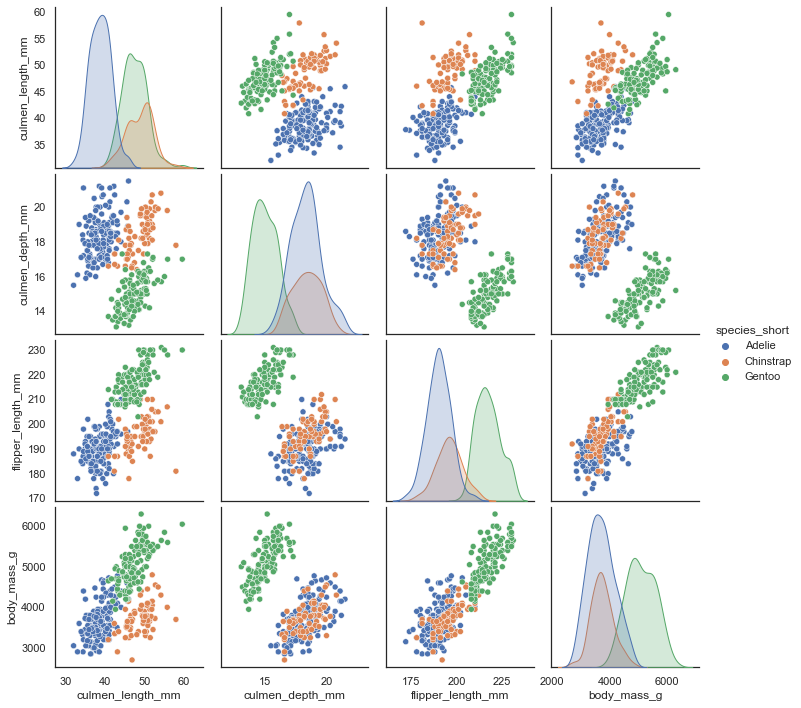

In [18]:
sns.pairplot(penguins, hue='species_short');


Before we can do any work with the data it will help to clean up it a
little. We won't need NAs, we just want the measurement columns, and
since the measurements are on entirely different scales it will be
helpful to convert each feature into z-scores (number of standard
deviations from the mean) for comparability.


In [19]:
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

We're ready for our analysis. Since we don't want to have to do this work again repeatedly, this is a nice place to save our work (i.e. let Easydata remember the recipe for us), and have the notebook here as a handy reference still if we want to refer back to it. 

## Save the new datasets using this Notebook as a Transformer

#### Default Better Principle: Keep easy-to-use data recipes

We will now save new data as a derived Dataset, say `penguins-clean` and `penguins-scaled`, so that we can access the processed data from anywhere this repo is installed via `Dataset.load()`. For our purposes that will be the next notebook! We'll do it in another notebook to separate the grungy prep work from the analysis itself.

Easydata uses what are called Dataset "Transformers" to record dependencies between Datasets.These Transformers can work as one-to-one, one-to-many, and even many-to-many transformations. 

Often, Transformers are simply python functions that derive one dataset from another. Easydata also has the ability to use a Jupyter Notebook as a Transformer, where the code of this Notebook acts as the function that transforms one dataset into another. 

Using the notebook-as-transformer feature is a nice way to ensure that an analysis is documented and reproducible, and a great way to save a derived dataset for analysis in a different notebook entirely.

Here we will generate a pair of derived datasets and save them to the Easydata Dataset catalog. Make list all the Dataset dependencies when making this call. The "input datasets" are the Datasets the we load in the Notebook via `Dataset.load()`, and the "ouput datasets" are the derived datasets themselves; e.g. the Datasets that we create in the following two cells.

In [20]:
scaled_dataset_name = "penguins-scaled"
scaled_data = scaled_penguin_data
scaled_metadata = ds.metadata.copy() # start with a copy of the same metadata

# add some new metadata description reflecting what we did
scaled_descr_txt = f"""\n\nData cleaned up by removing NAs and scaling. See notebook 04."""

scaled_metadata['descr'] += scaled_descr_txt

scaled_ds = Dataset(dataset_name=scaled_dataset_name, data=scaled_data,
                 metadata=scaled_metadata)

In [21]:
clean_dataset_name = "penguins-clean"
clean_data = penguins
clean_metadata = ds.metadata.copy() # start with a fresh copy of the same metadata


# add some new metadata description reflecting what we did
clean_descr_txt = f"""\n\nData cleaned up by removing NAs. See notebook 04."""

clean_metadata['descr'] += clean_descr_txt

clean_ds = Dataset(dataset_name=clean_dataset_name, data=clean_data,
                 metadata=clean_metadata)

In [22]:
# Due to various design choiced in Jupyter, we need to specify this name manually.
## BUG ALERT: A silly bug crept in right before the tutorial.
## If this cell fails, try running it a second time. 
## Sorry. we'll squash this bug after pydata
nbname = '04-Data-Challenge.ipynb'
dsdict = notebook_as_transformer(notebook_name=nbname,
                                 input_datasets=[ds],
                                 output_datasets=[scaled_ds, clean_ds],
                                 overwrite_catalog=True)

2021-10-29 23:47:05,706 - catalog - DEBUG - Loaded 3 records from 'transformers' Catalog.


2021-10-29 23:47:05,707 - catalog - DEBUG - Verifying serialization for catalog 'transformers'


2021-10-29 23:47:05,709 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2021-10-29 23:47:05,710 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2021-10-29 23:47:05,711 - datasets - DEBUG - Loaded DatasetGraph with 4 nodes and 3 edges.


2021-10-29 23:47:05,712 - datasets - DEBUG - Updating hashes for dataset 'penguins-scaled': {'hashes': {'data': 'sha1:4bd9b10eb54cfdbbcdf0fbeba27e9cf6687cc9bb', 'target': 'sha1:38f65f3b11da4851aaaccc19b1f0cf4d3806f83b'}}.


2021-10-29 23:47:05,712 - helpers - DEBUG - dataset:penguins-scaled already in catalog


2021-10-29 23:47:05,712 - helpers - DEBUG - Hashes match for penguins-scaled. Skipping Overwrite.


2021-10-29 23:47:05,713 - helpers - DEBUG - Writing dataset:penguins-scaled to disk


2021-10-29 23:47:05,715 - datasets - DEBUG - Updating hashes for dataset 'penguins-scaled': {'hashes': {'data': 'sha1:4bd9b10eb54cfdbbcdf0fbeba27e9cf6687cc9bb', 'target': 'sha1:38f65f3b11da4851aaaccc19b1f0cf4d3806f83b'}}.


2021-10-29 23:47:05,716 - datasets - DEBUG - Wrote Dataset Metadata: penguins-scaled.metadata


2021-10-29 23:47:05,717 - datasets - DEBUG - Wrote Dataset: penguins-scaled.dataset


2021-10-29 23:47:05,718 - helpers - DEBUG - Generating Transformer edge


2021-10-29 23:47:05,718 - catalog - DEBUG - Writing entry:'_penguins-scaled_penguins-clean' to catalog:'transformers'.


2021-10-29 23:47:05,719 - datasets - WARNING - Overwrite_catalog=True but generate=False. Not overwriting Dataset catalog entry for 'penguins-clean'


2021-10-29 23:47:05,719 - datasets - WARNING - Overwrite_catalog=True but generate=False. Not overwriting Dataset catalog entry for 'penguins-scaled'


2021-10-29 23:47:05,723 - datasets - DEBUG - Updating hashes for dataset 'penguins-clean': {'hashes': {'data': 'sha1:67a4b737f8d5f28841372297bbb5623a75250123', 'target': 'sha1:38f65f3b11da4851aaaccc19b1f0cf4d3806f83b'}}.


2021-10-29 23:47:05,724 - helpers - DEBUG - dataset:penguins-clean already in catalog


2021-10-29 23:47:05,724 - helpers - DEBUG - Hashes match for penguins-clean. Skipping Overwrite.


2021-10-29 23:47:05,724 - helpers - DEBUG - Writing dataset:penguins-clean to disk


2021-10-29 23:47:05,730 - datasets - DEBUG - Updating hashes for dataset 'penguins-clean': {'hashes': {'data': 'sha1:67a4b737f8d5f28841372297bbb5623a75250123', 'target': 'sha1:38f65f3b11da4851aaaccc19b1f0cf4d3806f83b'}}.


2021-10-29 23:47:05,732 - datasets - DEBUG - Wrote Dataset Metadata: penguins-clean.metadata


2021-10-29 23:47:05,734 - datasets - DEBUG - Wrote Dataset: penguins-clean.dataset


2021-10-29 23:47:05,734 - helpers - DEBUG - Generating Transformer edge


2021-10-29 23:47:05,735 - catalog - DEBUG - Writing entry:'_penguins-scaled_penguins-clean' to catalog:'transformers'.


2021-10-29 23:47:05,736 - datasets - WARNING - Overwrite_catalog=True but generate=False. Not overwriting Dataset catalog entry for 'penguins-clean'


2021-10-29 23:47:05,737 - datasets - WARNING - Overwrite_catalog=True but generate=False. Not overwriting Dataset catalog entry for 'penguins-scaled'


Check that we can now load our new dataset from the Dataset Catalog.

In [23]:
new_ds = Dataset.load("penguins-scaled")

2021-10-29 23:47:05,746 - catalog - DEBUG - Loaded 3 records from 'transformers' Catalog.


2021-10-29 23:47:05,746 - catalog - DEBUG - Verifying serialization for catalog 'transformers'


2021-10-29 23:47:05,748 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2021-10-29 23:47:05,749 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2021-10-29 23:47:05,750 - datasets - DEBUG - Loaded DatasetGraph with 4 nodes and 3 edges.


2021-10-29 23:47:05,750 - datasets - DEBUG - Verifying hashes using Dataset catalog.


2021-10-29 23:47:05,752 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2021-10-29 23:47:05,752 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2021-10-29 23:47:05,754 - datasets - DEBUG - Load penguins-scaled from disk...


2021-10-29 23:47:05,755 - datasets - DEBUG - Loaded penguins-scaled from disk.


Let's check that `.data` is the same as expected:

In [24]:
(new_ds.data == scaled_penguin_data).all()

True

And that the `.DESCR` text has been updated the way we stated.

In [25]:
print(new_ds.DESCR)


The goal of palmerpenguins is to provide a great dataset for data exploration & visualization, as an alternative to `iris`.

More information can be found at [https://github.com/allisonhorst/palmerpenguins](https://github.com/allisonhorst/palmerpenguins).

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

The data consists of measurements of bill (culmen) and flippers and weights of three species of penguins, along with some other metadata about the penguins. In total we have 334 different penguins measured.

Data cleaned up by removing NAs and scaling. See notebook 04.


Finally, let's check that the license passed on appropriately:

In [26]:
print(new_ds.LICENSE)


Data are available by [CC-0](https://github.com/allisonhorst/palmerpenguins) license in accordance with the Palmer Station LTER Data Policy and the LTER Data Access Policy for Type I data.



Now when you come back to this environment and want to use this dataset, all you need to do is running `Dataset.load('penguins-clean')`. You don't even have to re-run this notebook. All the work of generating the dataset will be done automatically once your notebook-as-transformer is added to the Dataset catalog.


**Note**:The Dataset Catalog is managed by git. You should see some new, non-checked in files in your catalog related to...you guessed it...penguins! 

If you're participating in the **Bonus Git Challenge**:

* See what has changed by typing `git status`

* Check these catalog changes in now. 

## Complete the challenge
Let's make sure that the data recipes work, that you have successfully created your new (derived) datasets, and that these datasets are now available via Dataset catalog.

**YOUR NEXT TASK**: Run `make data_challenge` once you've worked through this notebook to check that you've completed the challenge and to continue with your reproducibility quest.